In [1]:
import gdal
import numpy as np
import sys
import argparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()


In [7]:
import subprocess
#import glob
#files = glob.glob("/home/malavika/test/Kmeans/*")
#for file in files:
 #   out = file.replace(".tif", "_clrTextFile_output.txt"))
subprocess.call(["python", "formwork.py", file, "/home/malavika/clrTxtFile.txt", file.replace(".tif", "_clrTextFile_output.txt"), "--k", "8", "--flag"])

/home/malavika/test/Kmeans/tharangini_sitestatus_2017_08_30_rawdem_global_clrTextFile_output.txt
/home/malavika/test/Kmeans/thecolumns_2017_04_29_dem_global_clrTextFile_output.txt
/home/malavika/test/Kmeans/thecolumns_2017_05_20_dem_global_clrTextFile_output.txt
/home/malavika/test/Kmeans/thecolumns_2017_07_04_dem_global_clrTextFile_output.txt
/home/malavika/test/Kmeans/tharangini_sitestatus_2017_08_23_rawdem_global_clrTextFile_output.txt
/home/malavika/test/Kmeans/tharangini_sitestatus_2017_08_14-rawdem_global_clrTextFile_output.txt


In [2]:
src_ds = gdal.Open( "/home/malavika/tharangini_formwork_09_27.tif" )
src_band = src_ds.GetRasterBand(1).ReadAsArray().astype(np.float).flatten()
no_data_val = src_ds.GetRasterBand(1).GetNoDataValue()
no_data_index = np.where(src_band==no_data_val)
src_band_array = np.delete(src_band,no_data_index)

In [69]:
import combine_hillshaded_colorized
import create_colorized_dem
import csv
import statistics
from sklearn.cluster import KMeans
rng = 0.7
elevation = []

with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    data = len(list(reader))
print(data)
kmeans = KMeans(n_clusters = data).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
center_index = kmeans.predict(src_band_array.reshape(-1,1))
floor = cluster_center[statistics.mode(center_index)]
print(floor)
range_array = src_band_array[(src_band_array<=floor+rng) & (src_band_array>=floor-rng)]
#print(sorted(range_array))
kmeans_range = KMeans(n_clusters = data-2).fit(range_array.reshape(-1,1))
cluster_center_range = np.array([x[0] for x in kmeans_range.cluster_centers_])
elevation.extend(sorted(cluster_center_range.tolist()))
#print(elevation)
elevation.insert(0,floor-rng)
#elevation.insert(0,cluster_center_range.min() - 0.01)
elevation.append(floor+rng)
#elevation.append(cluster_center_range.max() + 0.01)
print(elevation)
print(len(elevation))
arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
#print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/test/Formwork/clrspectrum_06_08_kmeans.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/test/Formwork/tharangini_formwork_06_08.tif", "/home/malavika/test/Formwork/clrspectrum_06_08_kmeans.txt")

21
882.864346259


INFO:DEM Dir is /home/malavika/test/Formwork, DEM File is tharangini_formwork_06_08.tif DEM Name without extension is tharangini_formwork_06_08


[882.16434625871091, 882.2116493173468, 882.2950013271329, 882.3575686498714, 882.4137329082404, 882.4686331987361, 882.5286638940349, 882.5905554296756, 882.6669230025813, 882.7359386491501, 882.7861346087172, 882.8212655009197, 882.8508554887268, 882.8752502087557, 882.8995352490933, 882.923921497911, 882.951789310516, 882.9791243571373, 883.0087983228669, 883.0433317882283, 883.564346258711]
21
0 0
0 8192


INFO:Output colorized and hillshaded DEM is at - /home/malavika/test/Formwork/tharangini_formwork_06_08-crhs.tif
INFO:Done


In [56]:
import combine_hillshaded_colorized
import create_colorized_dem
create_colorized_dem.createColorAndHSDems("/home/malavika/test/Formwork/tharangini_formwork_09_27.tif", "/home/malavika/test/Formwork/out_clrspectrum_09_27_2.txt")

INFO:DEM Dir is /home/malavika/test/Formwork, DEM File is tharangini_formwork_09_27.tif DEM Name without extension is tharangini_formwork_09_27
INFO:Output colorized and hillshaded DEM is at - /home/malavika/test/Formwork/tharangini_formwork_09_27-crhs.tif
INFO:Done


0 0


In [67]:
layers= {
"floor" : 115.97,
"floor_tolerance" : 0.05,
"sunken_floor" : 0.05,
"sunken_floor_tolerance" : 0.005,
"primary_beam" : 0.4,
"primary_beam_tolerance" : 0.005,
"secondary_beam" : 0.6,
"secondary_beam_tolerance" : 0.005
}

elevation = []

#layers["floor_tolerance"] = layers.get("floor_toelranve", 0.05)

elevation.append(layers["floor"] + layers.get("floor_tolerance", 0.05) + 0.1)

elevation.append(layers["floor"] + layers.get("floor_tolerance", 0.05))
elevation.append(layers["floor"])

if (layers["floor"] - layers.get("floor_tolerance", 0.05)) > (layers["floor"] - layers["sunken_floor"] + layers.get("sunken_floor_tolerance", 0.005)):

    elevation.append(layers["floor"] - layers.get("floor_tolerance", 0.05))
    elevation.append(layers["floor"] - layers["sunken_floor"] + layers.get("sunken_floor_tolerance", 0.005))

else:
    elevation.append((2*layers["floor"] - layers["sunken_floor"])/2)
    
elevation.append(layers["floor"] - layers["sunken_floor"])

if (layers["floor"] - layers["sunken_floor"] - layers.get("sunken_floor_tolerance", 0.005)) > (layers["floor"] - layers["primary_beam"] + layers.get("primary_beam_tolerance", 0.005)):
    elevation.append(layers["floor"] - layers["sunken_floor"] - layers.get("sunken_floor_tolerance", 0.005))
    elevation.append(layers["floor"] - layers["primary_beam"] + layers.get("primary_beam_tolerance", 0.005))
else:
    elevation.append((2*layers["floor"] - layers["primary_beam"])/2)
    
elevation.append(layers["floor"] - layers["primary_beam"])

if ("secondary_beam" in layers) == False:
    elevation.append(layers["floor"] - layers["primary_beam"] - layers.get("primary_beam_tolerance",0.005))
else:
    if (layers["floor"] - layers["primary_beam"] - layers.get("primary_beam_tolerance",0.005)) > (layers["floor"] + layers["secondary_beam"] + layers.get("secondary_beam_tolerance",0.005)):
        elevation.append(layers["floor"] - layers["primary_beam"] - layers.get("primary_beam_tolerance",0.005))
        elevation.append(layers["floor"] - layers["secondary_beam"] + layers.get("secondary_beam_tolerance",0.005))
    else:
        elevation.append((2*layers["floor"] - layers["secondary_beam"])/2)
        
    elevation.append(layers["floor"] - layers["secondary_beam"])
    elevation.append(layers["floor"] - layers["secondary_beam"] - layers.get("secondary_beam_tolerance",0.005))

print(elevation)
elevation = list(reversed(elevation))
print(elevation)

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
#print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/test/Formwork/clrspectrum_09_04_floor.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/test/Formwork/tharangini_formwork_09_04.tif", "/home/malavika/test/Formwork/clrspectrum_09_04_floor.txt")

INFO:DEM Dir is /home/malavika/test/Formwork, DEM File is tharangini_formwork_09_04.tif DEM Name without extension is tharangini_formwork_09_04


[116.11999999999999, 116.02, 115.97, 115.945, 115.92, 115.915, 115.57499999999999, 115.57, 115.67, 115.37, 115.36500000000001]
[115.36500000000001, 115.37, 115.67, 115.57, 115.57499999999999, 115.915, 115.92, 115.945, 115.97, 116.02, 116.11999999999999]
0 0
0 8192
8192 0
8192 8192


INFO:Output colorized and hillshaded DEM is at - /home/malavika/test/Formwork/tharangini_formwork_09_04-crhs.tif
INFO:Done


In [65]:
layers= {
"floor" : 116.04,
"floor_tolerance" : 0.05,
"sunken_floor" : 0.05,
"sunken_floor_tolerance" : 0.005,
"primary_beam" : 0.4,
"primary_beam_tolerance" : 0.005,
"secondary_beam" : 0.6,
"secondary_beam_tolerance" : 0.005
}

elevation = []

#layers["floor_tolerance"] = layers.get("floor_toelranve", 0.05)

elevation.append(layers["floor"] + layers.get("floor_tolerance", 0.05) + 0.1)
elevation.append(layers["floor"] + layers.get("floor_tolerance", 0.05))
elevation.append(layers["floor"])
elevation.append(layers["floor"] - layers.get("floor_tolerance", 0.05))
elevation.append(layers["floor"] - layers["sunken_floor"] + layers.get("sunken_floor_tolerance", 0.005))
elevation.append(layers["floor"] - layers["sunken_floor"])
elevation.append(layers["floor"] - layers["sunken_floor"] - layers.get("sunken_floor_tolerance", 0.005))
elevation.append(layers["floor"] - layers["primary_beam"] + layers.get("primary_beam_tolerance", 0.005))
elevation.append(layers["floor"] - layers["primary_beam"])
elevation.append(layers["floor"] - layers["primary_beam"] - layers.get("primary_beam_tolerance",0.005))
if ("secondary_beam" in layers) == True:
    elevation.append(layers["floor"] - layers["secondary_beam"] + layers.get("secondary_beam_tolerance",0.005))
    elevation.append(layers["floor"] - layers["secondary_beam"])
    elevation.append(layers["floor"] - layers["secondary_beam"] - layers.get("secondary_beam_tolerance",0.005))

elevation = sorted(list(set(elevation)))
print(elevation)

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
#print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/test/Formwork/clrspectrum_09_04_userip_proper.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/test/Formwork/tharangini_formwork_09_04.tif", "/home/malavika/test/Formwork/clrspectrum_09_04_userip_proper.txt")

INFO:DEM Dir is /home/malavika/test/Formwork, DEM File is tharangini_formwork_09_04.tif DEM Name without extension is tharangini_formwork_09_04


[115.43500000000002, 115.44000000000001, 115.44500000000001, 115.635, 115.64, 115.645, 115.98500000000001, 115.99000000000001, 115.995, 116.04, 116.09, 116.19]
0 0
0 8192
8192 0
8192 8192


INFO:Output colorized and hillshaded DEM is at - /home/malavika/test/Formwork/tharangini_formwork_09_04-crhs.tif
INFO:Done


In [14]:
from scipy.signal import argrelextrema
centers = argrelextrema(range_array, np.greater)
print(centers)

(array([       9,       11,       17, ..., 13825076, 13825078, 13825085]),)


In [9]:
import numpy as np
from matplotlib import pyplot as plt
import peakutils
plt.clf()
plt.hist(range_array, bins = 21)
data = np.hist(range_array, bins = 21)
plt.show()
peaks = peakutils.peak.indexes(data, thres=5000, min_dist=0.01)
print(data[peaks])

ImportError: No module named 'peakutils'

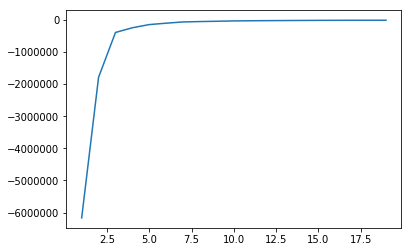

In [3]:
scores = []
for i in range(1,20):
    scores.append(KMeans(n_clusters = i).fit(src_band_array.reshape(-1,1)).score(src_band_array.reshape(-1,1)))
plt.clf()
plt.plot(range(1,20),scores)
plt.show()

185.821685791
42.4747772217
143346
[ 107.97022232  159.05211103  101.69974582  120.76450787]


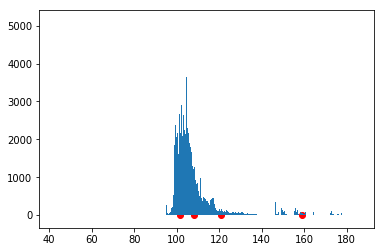

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
print(src_band_array.max())
print(src_band_array.min())
no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
print(no_of_bins)
kmeans = KMeans(n_clusters = 4).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
print(cluster_center)
plt.clf()
plt.hist(src_band_array, bins = no_of_bins)
y = np.zeros(4, dtype = int)
plt.scatter(cluster_center, y, c = 'r')
plt.show()

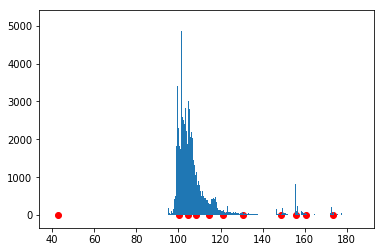

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def cluster_centroids(classes, w, clusters, k):
    results=[]
    for i in range(k):
        results.append(np.average(classes[clusters == i],weights = w[clusters ==i]))
    return results

def kmeans(classes, w, k=None, no_of_it=300):
    #centroids = np.random.choice(classes, k, False)
    centroids = []
    value = 0
    for _ in range(k):
        centroids.append(classes[value])
        value = value + int(len(classes)/k)

    for n in range(no_of_it):
        cen_dists=[]
        for i in range(len(classes)):
            dists = []
            for j in range(len(centroids)):
                dists.append(abs(classes[i] - centroids[j]))
            cen_dists.append(dists)
        
        clusters = []
        for i in range(len(cen_dists)):
            dist = cen_dists[i]
            clusters.append(dist.index(min(dist)))
        clusters = np.array(clusters)

        new_centroids = cluster_centroids(classes, w, clusters, k)
        #print(n)
        if np.array_equal(new_centroids, centroids):
            break
        else:
            if(n == no_of_it):
                print("Centroids did not converge")

        centroids = new_centroids

    return clusters, centroids

no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
weights, bin_edges = np.histogram(src_band_array, bins = no_of_bins)
zero_index = np.where(weights==0)
w = np.delete(weights,zero_index)
bins = []
value = src_band_array.min()
for i in range(no_of_bins):
    bins.append(value)
    value = value + 0.001
bins = np.array(bins)
classes = np.delete(bins,zero_index)

cluster, cen = kmeans(classes, w, 11)

plt.clf()
plt.hist(src_band_array, bins = no_of_bins)
y = np.zeros(11, dtype = int)
plt.scatter(cen, y, c = 'r')
plt.show()


In [7]:
import numpy
import scipy
def cluster_centroids(classes, w, clusters, k):
    results=[]
    for i in range(k):
        results.append(np.average(classes[clusters == i],weights = w[clusters ==i]))
    return results

def kmeans(classes, w, k=None, no_of_it=300):
    #centroids = np.random.choice(classes, k, False)
    centroids = []
    value = 0
    for _ in range(k):
        centroids.append(classes[value])
        value = value + int(len(classes)/k)

    for n in range(no_of_it):
        cen_dists=[]
        for i in range(len(classes)):
            dists = []
            for j in range(len(centroids)):
                dists.append(abs(classes[i] - centroids[j]))
            cen_dists.append(dists)
        
        clusters = []
        for i in range(len(cen_dists)):
            dist = cen_dists[i]
            clusters.append(dist.index(min(dist)))
        clusters = np.array(clusters)

        new_centroids = cluster_centroids(classes, w, clusters, k)
        #print(n)
        if np.array_equal(new_centroids, centroids):
            break
        else:
            if(n == no_of_it):
                print("Centroids did not converge")

        centroids = new_centroids

    return clusters, centroids

no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
print(no_of_bins)
w, bin_edges = np.histogram(src_band_array, bins = no_of_bins)
print(w)
print(len(w))
classes = []
print(src_band_array.max())
print(src_band_array.min())
value = src_band_array.min()
for i in range(no_of_bins):
    classes.append(value)
    value = value + 0.001
classes = np.array(classes)
print(classes)
print(len(classes))

cluster, cen = kmeans(classes, w, 11)

print(cluster)
print(sorted(cen))

16061
[19  8  0 ...,  0  0  1]
16061
107.731674194
91.6697463989
[  91.6697464   91.6707464   91.6717464 ...,  107.7277464  107.7287464
  107.7297464]
16061
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
[ 0  0  0 ..., 10 10 10]
[92.400344019414788, 93.494395255428913, 94.394483818384373, 95.498783888772991, 97.200294732789501, 98.91464711272414, 99.595124660906222, 101.31280413532403, 102.70985697923254, 104.32443801993641, 106.24029543394579]


In [24]:
import combine_hillshaded_colorized
import create_colorized_dem
import csv
elevation = sorted(cen)
elevation.insert(0,src_band_array.min())
elevation.append(src_band_array.max())

arr = []
new_arr=[]
with open("/home/malavika/clrTxtFile.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/test/clrTxtFile_mysore",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/test/Mysore-airport-overall-site-dem.tif", "/home/malavika/test/clrTxtFile_mysore.txt")

INFO:DEM Dir is /home/malavika/test, DEM File is Mysore-airport-overall-site-dem.tif DEM Name without extension is Mysore-airport-overall-site-dem


[[627.15203857421875, '0', '0', '0'], [649.35292175641371, '255', '0', '0'], [691.79231672070841, '204', '51', '0'], [701.62053794919268, '255', '166', '77'], [704.99340781177557, '255', '210', '77'], [708.35256156187745, '153', '255', '153'], [711.30541461117434, '51', '204', '51'], [714.43463813896699, '0', '153', '51'], [717.73307138731366, '204', '203', '255'], [721.37889844096298, '128', '179', '255'], [725.2791073665793, '179', '128', '255'], [729.22215560121947, '255', '102', '255'], [742.69464111328125, '0', '0', '0']]
0 0
0 8192
0 16384
8192 0
8192 8192
8192 16384
16384 0
16384 8192
16384 16384
24576 0
24576 8192
24576 16384


INFO:Output colorized and hillshaded DEM is at - /home/malavika/test/Mysore-airport-overall-site-dem-crhs.tif
INFO:Done


In [8]:
import gdal
import numpy as np
import sys
import argparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import combine_hillshaded_colorized
import create_colorized_dem
import csv

src_ds = gdal.Open( "/home/malavika/Downloads/ganges_internationale_solar_plant_2017_12_23_icr_3_outputs_clipped_global_solar_farm_2017_12_23_icr_3_rev3_dem_utm_clipped_global.tif" )
src_band = src_ds.GetRasterBand(1).ReadAsArray().astype(np.float).flatten()
no_data_val = src_ds.GetRasterBand(1).GetNoDataValue()
no_data_index = np.where(src_band==no_data_val)
src_band_array = np.delete(src_band,no_data_index)

def cluster_centroids(classes, w, clusters, k):
    results=[]
    for i in range(k):
        np.sum(w[clusters == i])
        results.append(np.average(classes[clusters == i],weights = w[clusters ==i]))
    return results

def kmeans(classes, w, k=None, no_of_it=300):
    #centroids = np.random.choice(classes, k, False)
    centroids = []
    value = 0
    for _ in range(k):
        centroids.append(classes[value])
        value = value + int(len(classes)/k)

    for n in range(no_of_it):
        cen_dists=[]
        for i in range(len(classes)):
            dists = []
            for j in range(len(centroids)):
                dists.append(abs(classes[i] - centroids[j]))
            cen_dists.append(dists)
        
        clusters = []
        for i in range(len(cen_dists)):
            dist = cen_dists[i]
            clusters.append(dist.index(min(dist)))
        clusters = np.array(clusters)

        new_centroids = cluster_centroids(classes, w, clusters, k)
        #print(n)
        if np.array_equal(new_centroids, centroids):
            break
        else:
            if(n == no_of_it):
                print("Centroids did not converge")

        centroids = new_centroids

    return clusters, centroids

no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
print(no_of_bins)
weights, bin_edges = np.histogram(src_band_array, bins = no_of_bins)
print(weights)
print(len(weights))
zero_index = np.where(weights==0)
w = np.delete(weights,zero_index)
print(w)
print(len(w))
bins = []
print(src_band_array.max())
print(src_band_array.min())
value = src_band_array.min()
for i in range(no_of_bins):
    bins.append(value)
    value = value + 0.001
bins = np.array(bins)
classes = np.delete(bins,zero_index)
print(classes)
print(len(classes))

cluster, cen = kmeans(classes, w, 11)

print(cluster)
print(sorted(cen))

elevation = sorted(cen)
elevation.insert(0,src_band_array.min())
elevation.append(src_band_array.max())

arr = []
new_arr=[]
with open("/home/malavika/clrTxtFile.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/Downloads/ganges_clrTxtFile.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/Downloads/ganges_internationale_solar_plant_2017_12_23_icr_3_outputs_clipped_global_solar_farm_2017_12_23_icr_3_rev3_dem_utm_clipped_global.tif", "/home/malavika/Downloads/ganges_clrTxtFile.txt")

50443
[1 0 0 ..., 0 0 1]
50443
[1 2 2 ..., 1 1 1]
47123
113.563262939
63.1199417114
[  63.11994171   63.51094171   63.51194171 ...,  113.15994171  113.34394171
  113.56194171]
47123


INFO:DEM Dir is /home/malavika/Downloads, DEM File is ganges_internationale_solar_plant_2017_12_23_icr_3_outputs_clipped_global_solar_farm_2017_12_23_icr_3_rev3_dem_utm_clipped_global.tif DEM Name without extension is ganges_internationale_solar_plant_2017_12_23_icr_3_outputs_clipped_global_solar_farm_2017_12_23_icr_3_rev3_dem_utm_clipped_global


[ 0  0  0 ..., 10 10 10]
[71.549945406634961, 77.403700951483543, 80.478156604771101, 83.113244563553991, 85.248605611871469, 87.134783328657008, 89.146757829276979, 91.035000605411895, 93.860825092380978, 97.552830607570669, 103.35413112915154]
[[63.119941711425781, '0', '0', '0'], [71.549945406634961, '255', '0', '0'], [77.403700951483543, '204', '51', '0'], [80.478156604771101, '255', '166', '77'], [83.113244563553991, '255', '210', '77'], [85.248605611871469, '153', '255', '153'], [87.134783328657008, '51', '204', '51'], [89.146757829276979, '0', '153', '51'], [91.035000605411895, '204', '203', '255'], [93.860825092380978, '128', '179', '255'], [97.552830607570669, '179', '128', '255'], [103.35413112915154, '255', '102', '255'], [113.56326293945312, '0', '0', '0']]


INFO:Output colorized and hillshaded DEM is at - /home/malavika/Downloads/ganges_internationale_solar_plant_2017_12_23_icr_3_outputs_clipped_global_solar_farm_2017_12_23_icr_3_rev3_dem_utm_clipped_global-crhs.tif
INFO:Done


0 0


In [2]:
import gdal
import numpy as np
import sys
import argparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import combine_hillshaded_colorized
import create_colorized_dem
import csv
import statistics

src_ds = gdal.Open( "/home/malavika/tharangini_formwork_09_27.tif" )
src_band = src_ds.GetRasterBand(1).ReadAsArray().astype(np.float).flatten()
no_data_val = src_ds.GetRasterBand(1).GetNoDataValue()
no_data_index = np.where(src_band==no_data_val)
src_band_array = np.delete(src_band,no_data_index)

def cluster_centroids(classes, w, clusters, k):
    results=[]
    for i in range(k):
        results.append(np.average(classes[clusters == i],weights = w[clusters ==i]))
    return results

def kmeans(classes, w, k=None, no_of_it=300):
    #centroids = np.random.choice(classes, k, False)
    centroids = []
    value = 0
    for _ in range(k):
        centroids.append(classes[value])
        value = value + int(len(classes)/k)

    for n in range(no_of_it):
        cen_dists=[]
        for i in range(len(classes)):
            dists = []
            for j in range(len(centroids)):
                dists.append(abs(classes[i] - centroids[j]))
            cen_dists.append(dists)
        
        clusters = []
        for i in range(len(cen_dists)):
            dist = cen_dists[i]
            clusters.append(dist.index(min(dist)))
        clusters = np.array(clusters)

        new_centroids = cluster_centroids(classes, w, clusters, k)
        #print(n)
        if np.array_equal(new_centroids, centroids):
            break
        else:
            if(n == no_of_it):
                print("Centroids did not converge")

        centroids = new_centroids

    return clusters, centroids

rng = 0.7

no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
weights, bin_edges = np.histogram(src_band_array, bins = no_of_bins)
zero_index = np.where(weights==0)
w = np.delete(weights,zero_index)
bins = []
value = src_band_array.min()
for i in range(no_of_bins):
    bins.append(value)
    value = value + 0.001
bins = np.array(bins)
classes = np.delete(bins,zero_index)

with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    data = len(list(reader))

cluster, cen = kmeans(classes, w, data)
print(cluster,cen)
floor = cen[statistics.mode(cluster)]
print(floor)
range_array = src_band_array[(src_band_array<=floor+rng) & (src_band_array>=floor-rng)]

no_of_bins = int((range_array.max()-range_array.min())*1000)
weights, bin_edges = np.histogram(range_array, bins = no_of_bins)
zero_index = np.where(weights==0)
w = np.delete(weights,zero_index)
bins = []
value = range_array.min()
for i in range(no_of_bins):
    bins.append(value)
    value = value + 0.001
bins = np.array(bins)
classes = np.delete(bins,zero_index)
new_cluster, new_cen = kmeans(classes, w, data-2)
elevation = sorted(new_cen)
elevation.insert(0,floor-rng)
elevation.append(floor+rng)

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/weighted_clrspectrum.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
#create_colorized_dem.createColorAndHSDems("/home/malavika/tharangini_formwork_09_27.tif", "/home/malavika/weighted_21_clrspectrum.txt")

[ 0  0  0 ..., 20 20 20] [101.14612710329708, 101.4080876891166, 101.91920230672365, 102.47996163404147, 103.23004175044581, 103.98557071140986, 104.71527808259529, 105.6780204149526, 106.65672940661295, 107.51018157983115, 108.02922428621127, 108.70728282036157, 109.12378204577229, 110.07241953588191, 110.42970614192036, 110.98822281886639, 111.85789148676261, 112.63835510971428, 112.79338442142365, 113.11815852031589, 115.96112508303085]
113.11815852
[[112.41815852031588, '0', '0', '0', ''], [112.4822228568687, '128', '0', '0'], [112.57611634227813, '160', '82', '45'], [112.63191320703785, '255', '0', '0'], [112.66236367924672, '255', '160', '122'], [112.73755482684069, '255', '140', '0'], [112.785547494919, '218', '165', '32'], [112.80944383206963, '255', '255', '0'], [112.95760294889047, '154', '205', '50'], [113.06910109253857, '0', '255', '0'], [113.09781422078362, '0', '128', '0'], [113.1189599310603, '60', '179', '113'], [113.13575248452626, '102', '205', '170'], [113.194740567

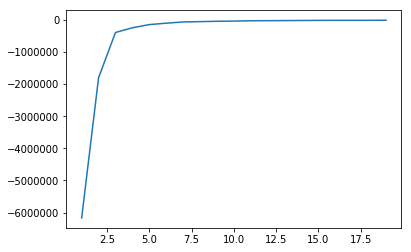

In [20]:
from sklearn.cluster import MiniBatchKMeans, KMeans
scores = []
for i in range(1,20):
    scores.append(MiniBatchKMeans(n_clusters = i, batch_size = 4000).fit(src_band_array.reshape(-1,1)).score(src_band_array.reshape(-1,1)))
plt.clf()
plt.plot(range(1,20),scores)
plt.show()

In [24]:
print(scores)
first_der = np.diff(scores, n=1)
print(first_der)
second_der = np.diff(first_der, n=1)
print(second_der)
elbow = abs(max(second_der))
print(elbow)
print(second_der.tolist().index(elbow))

[-6167375.0602725856, -1798456.922820857, -390004.2829176017, -243051.98810893012, -144279.53677624356, -100998.85559273347, -61860.401159942885, -52213.554258692966, -40914.490604066312, -34756.258344528178, -25187.554303608289, -22406.569770495407, -19504.505883844788, -16251.473318402974, -13199.050684180493, -11790.797700301104, -11166.084273656454, -11295.87999992563, -8695.0153055732608]
[  4.36891814e+06   1.40845264e+06   1.46952295e+05   9.87724513e+04
   4.32806812e+04   3.91384544e+04   9.64684690e+03   1.12990637e+04
   6.15823226e+03   9.56870404e+03   2.78098453e+03   2.90206389e+03
   3.25303257e+03   3.05242263e+03   1.40825298e+03   6.24713427e+02
  -1.29795726e+02   2.60086469e+03]
[ -2.96046550e+06  -1.26150035e+06  -4.81798435e+04  -5.54917701e+04
  -4.14222675e+03  -2.94916075e+04   1.65221675e+03  -5.14083140e+03
   3.41047178e+03  -6.78771951e+03   1.21079354e+02   3.50968679e+02
  -2.00609931e+02  -1.64416965e+03  -7.83539557e+02  -7.54509153e+02
   2.73066042e+

In [26]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import csv
import statistics
elevation = []
rng = 0.7
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    data = len(list(reader))
kmeans = MiniBatchKMeans(n_clusters = data, batch_size = 10000).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
center_index = kmeans.predict(src_band_array.reshape(-1,1))
floor = cluster_center[statistics.mode(center_index)]

range_array = src_band_array[(src_band_array<=floor+rng) & (src_band_array>=floor-rng)]
kmeans_range = MiniBatchKMeans(n_clusters = data-2, batch_size = 10000).fit(range_array.reshape(-1,1))
cluster_center_range = np.array([x[0] for x in kmeans_range.cluster_centers_])
elevation.extend(sorted(cluster_center_range.tolist()))
elevation.insert(0,floor-rng)
elevation.append(floor+rng)

import combine_hillshaded_colorized
import create_colorized_dem
import csv

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/minibatch10000_21_clrspectrum.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/tharangini_formwork_09_27.tif", "/home/malavika/minibatch10000_21_clrspectrum.txt")

INFO:DEM Dir is /home/malavika, DEM File is tharangini_formwork_09_27.tif DEM Name without extension is tharangini_formwork_09_27


[[112.4266885478462, '0', '0', '0', ''], [112.53566686617062, '128', '0', '0'], [112.62825637805761, '160', '82', '45'], [112.66288128337209, '255', '0', '0'], [112.73727147306876, '255', '160', '122'], [112.7842773794355, '255', '140', '0'], [112.8075771551879, '218', '165', '32'], [112.9043307058245, '255', '255', '0'], [113.00689859400929, '154', '205', '50'], [113.06129057526675, '0', '255', '0'], [113.08339514588448, '0', '128', '0'], [113.10259329144026, '60', '179', '113'], [113.11678587547848, '102', '205', '170'], [113.12915816245244, '0', '255', '255'], [113.14159766538066, '0', '139', '139'], [113.242826571153, '0', '0', '255'], [113.35007292444809, '0', '0', '128'], [113.47703202140148, '128', '0', '128'], [113.57955027853198, '199', '21', '133'], [113.69503286922682, '255', '0', '255'], [113.8266885478462, '0', '0', '0']]


INFO:Output colorized and hillshaded DEM is at - /home/malavika/tharangini_formwork_09_27-crhs.tif
INFO:Done


0 0


In [4]:
dem_type = 'double'
types = ['single', 'formwork', 'time-series']
if dem_type not in types:
    raise ValueError("specify dem type")

ValueError: specify dem type

In [9]:
arr = []
new_arr=[]
with open("/home/malavika/clrTxtFile.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
print(arr)
print(len(arr))

[['0', '0', '0'], ['255', '0', '0'], ['204', '51', '0'], ['255', '166', '77'], ['255', '210', '77'], ['153', '255', '153'], ['51', '204', '51'], ['0', '153', '51'], ['204', '203', '255'], ['128', '179', '255'], ['179', '128', '255'], ['255', '102', '255'], ['0', '0', '0']]
13


In [15]:
def meh(x,z,w):
    d = x-z-w
    return d
def blah(x,y,z=1,w=2):
    s = x+y
    b = z 
    c = meh(x,z,w)
    return s, b, c
blah(3,2,4)

(5, 4, -3)